In [1]:
import numpy
import pandas as pd
import statsmodels.formula.api as smf 
import statsmodels.stats.multicomp as multi
import seaborn
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\tikun\Documents\Data analysis projects\Alcohol Consumption\nesarc_pds.csv')

data['S2AQ8A'] = pd.to_numeric(data['S2AQ8A'],errors='coerce')
data['S2AQ8B'] = pd.to_numeric(data['S2AQ8B'],errors='coerce')
data['S1Q10B'] = pd.to_numeric(data['S1Q10B'],errors='coerce')
data['S1Q6A'] = pd.to_numeric(data['S1Q6A'],errors='coerce')
data['AGE'] = pd.to_numeric(data['AGE'],errors='coerce')


sub1=data[(data['AGE']>=18)]

sub2 = sub1.copy()
sub2['S2AQ8A']=sub2['S2AQ8A'].replace(99, numpy.nan)
sub2['S2AQ8B']=sub2['S2AQ8B'].replace(99, numpy.nan)


C:\Users\tikun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
sub2['Percat']=pd.qcut(sub2.S1Q10B,3,labels=["Low","Medium","High"])
sub2["Percat"] = sub2["Percat"].astype('category')

sub2['Gradecat'] = pd.qcut(sub2.S1Q6A,4,labels=["Primary","High School","College","Higher Studies"])
sub2["Gradecat"] = sub2["Gradecat"].astype('category')


recode1={1:365,2:360,3:208,4:104,5:52,6:36,7:12,8:11,9:6,10:2}
sub2['USFREQMO']=sub2['S2AQ8A'].map(recode1)
sub2['USFREQMO']=pd.to_numeric(sub2['USFREQMO'],errors='coerce')

sub2['Toxic_Lvl']=sub2['USFREQMO']*sub2['S2AQ8B']
sub2['Toxic_Lvl']=pd.to_numeric(sub2['Toxic_Lvl'],errors='coerce')

ct1 = sub2.groupby('Toxic_Lvl').size()
print (ct1)

Toxic_Lvl
2.0        2824
4.0         532
6.0        2073
8.0          52
10.0         21
           ... 
9125.0        2
10800.0       2
10950.0       3
15330.0       1
35770.0       1
Length: 132, dtype: int64


In [3]:
model1 = smf.ols(formula='Toxic_Lvl ~ C(Gradecat)', data=sub2).fit()
print (model1.summary())

sub3 = sub2[['Toxic_Lvl', 'Gradecat']].dropna()

print ("means for alcohol consumption by highest level of education")
m1= sub3.groupby('Gradecat').mean()
print (m1)

print ("standard deviation for mean alcohol consumption by highest level of education")
st1= sub3.groupby('Gradecat').std()
print (st1)





                            OLS Regression Results                            
Dep. Variable:              Toxic_Lvl   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     33.23
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.98e-21
Time:                        20:15:17   Log-Likelihood:            -2.0932e+05
No. Observations:               26642   AIC:                         4.186e+05
Df Residuals:                   26638   BIC:                         4.187e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

C:\Users\tikun\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(3.674999999999997, 0.5, 'Average alcohol consumption')

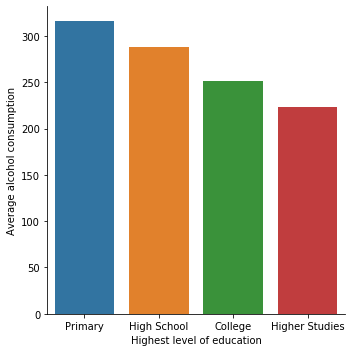

In [4]:
# bivariate bar graph
seaborn.factorplot(x="Gradecat", y="Toxic_Lvl", data=sub2, kind="bar", ci=None)
plt.xlabel('Highest level of education')
plt.ylabel('Average alcohol consumption')


In [7]:
sub4=sub3[(sub2['Percat']=='Low')]
sub5=sub3[(sub2['Percat']=='Medium')]
sub6=sub3[(sub2['Percat']=='High')]

print ('association between highest grade and alcohol consumption for low income group')
model2 = smf.ols(formula='Toxic_Lvl ~ C(Gradecat)', data=sub4).fit()
print (model2.summary())

print ('association between highest grade and alcohol consumption for middle income group')
model3 = smf.ols(formula='Toxic_Lvl ~ C(Gradecat)', data=sub5).fit()
print (model3.summary())

print ('association between highest grade and alcohol consumption for high income group')
model4 = smf.ols(formula='Toxic_Lvl ~ C(Gradecat)', data=sub6).fit()
print (model4.summary())



C:\Users\tikun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\tikun\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\tikun\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


association between highest grade and alcohol consumption for low income group
                            OLS Regression Results                            
Dep. Variable:              Toxic_Lvl   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.114
Date:                Sun, 25 Oct 2020   Prob (F-statistic):            0.00633
Time:                        20:38:11   Log-Likelihood:                -61587.
No. Observations:                7573   AIC:                         1.232e+05
Df Residuals:                    7569   BIC:                         1.232e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [8]:
print ("Means for Alcohol consumption by Highest grade  for low income group")
m2= sub4.groupby('Gradecat').mean()
print (m2)
print ("Means for Alcohol consumption by Highest grade  for middle income group")
m3 = sub5.groupby('Gradecat').mean()
print (m3)

print ("Means for Alcohol consumption by Highest grade  for high income group")
m4 = sub6.groupby('Gradecat').mean()
print (m4)

Means for Alcohol consumption by Highest grade  for low income group
                 Toxic_Lvl
Gradecat                  
Primary         313.565604
High School     280.316514
College         244.010889
Higher Studies  220.005906
Means for Alcohol consumption by Highest grade  for middle income group
                 Toxic_Lvl
Gradecat                  
Primary         304.903385
High School     292.685836
College         261.762827
Higher Studies  217.841557
Means for Alcohol consumption by Highest grade  for high income group
                 Toxic_Lvl
Gradecat                  
Primary         352.357775
High School     291.541017
College         244.598385
Higher Studies  225.896311
